<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/ViktorB9898-Lab2/Lab2/ViktorB9898_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Iterative Methods**
**Viktor Beck**

# **Abstract**

This programming assingment features iterative methods to solve matrix equations

Conclusion: 

#**About the code**

In [ ]:
"""This program is a lab report in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2023 Viktor Beck (vbeck@kth.se / viktor.beck98@gmail.com)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell.

In [ ]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np

from matplotlib import pyplot as plt
from scipy.misc import derivative

# **Introduction**

This report is about iterative methods. Function 1 is for solving the typical matrix equation Ax=b and function 3 and 5 are the Newton method for 1D and for multiple dimensions.

The input for this Lab report was taken from the book of Professor Hoffman (https://doi-org.focus.lib.kth.se/10.1137/1.9781611976724) which corresponds to the content of the course:

[Hyperlink to DD2363 course website.](https://kth.instructure.com/courses/17068)

# **Method**

### **1. Function: Jacobi iteration for Ax=b**

From chapter (7.7) in the book: The Jacobi iteration is based on spitting the matrix A into two matrices with $A_2 = A - A_1$ where $A_1 = D = diag(A)$ which gives $M_J = I-D^{-1}A$ and $c = D^{-1}b$. In index notation this gives
\begin{equation}
x_i^{k+1} = a_{ii}^{-1}\Big(b_i-\sum_{j \neq i}a_{ij}x_j^{k}\Big)
\end{equation}

In [ ]:
def jacobi_iteration(A, b, iterations = 100):
    n = len(b)
    x = np.zeros(n)
    x_old = np.ones(n)
    for k in range(iterations):
        for i in range(n):
                sum = 0
                for j in range(n): 
                    if j != i:
                        sum += A[i][j] * x_old[j]
                x[i] = 1/A[i][i] * (b[i] - sum)
        x_old = x
    return x

The function could have also been written in vector / matrix form instead of iterating over the index.

### **3. Function: Newton's method for scalar nonlinear equation f(x)=0**

From chapter (8.4): The Newton method is one of the simplest algorithms there is for solving $f(x)=0$ and still has quadratic convergence. In each iteration the zero of the tangent is calculated and used as the new x in the next iteration. The formula is:
\begin{equation}
x^{k+1} = x^k - f(x^k)/f'(x^k)
\end{equation}

In [ ]:
def newton_scalar(f, x0=1, tol=10**-6):
    x = x0
    x_list = []
    while np.linalg.norm(f(x)) > tol:
        x = x - f(x)/derivative(f, x, 10**-6)
        x_list.append(x)
    #return list to show convergence behavior
    return np.array(x_list)

### **5. Function: Newton's method for vector nonlinear equation f(x)=0**

Newton's method in multiple dimensions is given by the following function:
\begin{equation}
x_{k+1} = x_{k} - (f'(x))^{-1}f(x)
\end{equation}
where $f'$ is the Jacobian. If we translate this to code we get:

In [ ]:
def newton_vector(f, df, x0, N=12):
    x = x0
    err = []
    for n in range(0, N):
        x_old = x
        x = x - np.linalg.solve(df(x), f(x))
        # here we are calculating the stepwise error (for visualization)
        err.append(np.linalg.norm(x-x_old))
    return x, err

Since it is very complicated to compute the Jacobian we take df as an input parameter. There are some machine learning libraries for computing the Jacobian but no standard numpy or scipy function for that.

# **Results**

### **1. Function: Jacobi iteration for Ax=b**

Convergence of the Jacobi iteration is dependent on a diagonally dominant matrix A.

In [ ]:
n = 5

# add identity matrix to make sure the matrix is diagonally dominant
A = np.eye(n) + np.random.rand(n,n)
b = np.arange(n)


x = jacobi_iteration(A,b, iterations=50)

# manufactured solution
y = np.linalg.solve(A,b)

print("norm(Ax-b) =", np.linalg.norm(np.matmul(A,x) - b))
print("norm(x-y) =", np.linalg.norm(x-y))


norm(Ax-b) = 4.121799234506996e-14
norm(x-y) = 2.7406322543077535e-14


### **3. Function: Newton's method for scalar nonlinear equation f(x)=0**

In [ ]:
# some nonlinear function
def f(x):
    return x**3 + x**2 + x + 1

# function f has a zero at x = -1
y = -1

res = newton_scalar(f) #res[-1] is x*

# L2 norms
print("norm(f(x*)) =",np.linalg.norm(f(res[-1])))
print("norm(x*-y) =",np.linalg.norm(res[-1]-y))

norm(f(x*)) = 4.734604819311983e-08
norm(x*-y) = 2.36730235414484e-08


... we can see, that the method converges as the norms are almost 0.

Values of x* for each of the 7 steps: [ 0.33333333 -0.40740741 -1.41886063 -1.11848844 -1.01248218 -1.00015387
 -1.00000002]


Text(0.5, 1.0, 'x* for each step')

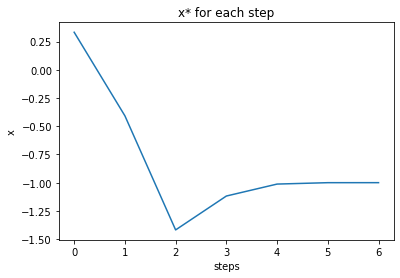

In [ ]:
print("Values of x* for each of the", len(res), "steps:" , res)
plt.plot(range(len(res)), res)
plt.xlabel("steps")
plt.ylabel("x")
plt.title("x* for each step")

### **5. Function: Newton's method for vector nonlinear equation f(x)=0**

In [ ]:
#I used these input functions already in another course, just recycled it here

def f(x):
    F = np.array([3*x[0] - np.cos(x[1]*x[2]) - 3/2,
                  4*x[0]**2 - 625*x[1]**2 + 2*x[2] - 1,
                  20*x[2] + np.exp(-x[0]*x[1]) + 9])
    return F

def df(x):
    DF = np.array([[3, np.sin(x[1]*x[2])*x[2], np.sin(x[1]*x[2])*x[1]],
                  [8*x[0], -1250*x[1], 2],
                  [-np.exp(-x[0]*x[1])*x[1], -np.exp(-x[0]*x[1])*x[2], 20]])
    return DF

x_zero, err = newton_vector(f, df, x0=np.array([1,1,1]), N=8)

# we assume that the exact value is reached after 20 iterations
y = newton_vector(f, df, x0=np.array([1,1,1]), N=20)[0]

#print("x* =", x_zero)
#print("y =", y)

print("norm(f(x)) =", np.linalg.norm(f(x_zero)))
print("norm(x-y) =",np.linalg.norm(x_zero-y))

norm(f(x)) = 1.4695066510871083e-05
norm(x-y) = 7.370047098576815e-07


Text(0, 0.5, 'stepwise error$||x_{k+1}-x_{k}||$')

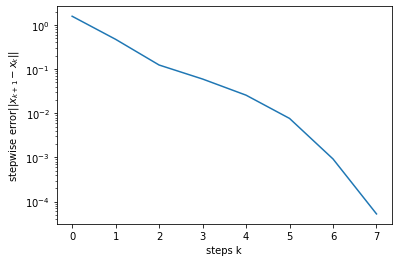

In [ ]:
plt.semilogy(np.arange(len(err)), err)
plt.xlabel('steps k')
plt.ylabel('stepwise error$||x_{k+1}-x_{k}||$')

# **Discussion**

The Jacobi method seems to be quite a good algorithm in terms of efficiency since it is not using any matrix multiplications or similar. But the algorithm is limited by the matrix A which has to be diagonally dominant.

The Newton method is also a very good algorithm since it has quadratic convergence. In multiple dimensions it becomes more difficult because we have to compute the Jacobian. 